TEST 1

Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

Functions

In [2]:
# Plot Linear Price of Selected Stocks
def plot_lin_price(prices_df, selected_stocks):
    plt.figure(figsize=(12, 6))
    
    for stock_symbol in selected_stocks:
        plt.plot(prices_df['Date'], prices_df[stock_symbol], label=stock_symbol)  # Use semilogy for logarithmic scale

    plt.title('Linear Price of Selected Stocks')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()


# Plot Logarithmic Price of Selected Stocks
def plot_log_price(prices_df, selected_stocks):
    plt.figure(figsize=(12, 6))
    
    for stock_symbol in selected_stocks:
        plt.semilogy(prices_df['Date'], prices_df[stock_symbol], label=stock_symbol)

    plt.title('Logarithmic Price of Selected Stocks')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot Normalized Price of Selected Stocks (Starting at 1)
def plot_normalized_prices(norm_prices_df, selected_stocks):
    plt.figure(figsize=(12, 6))

    for stock_symbol in selected_stocks:
        plt.plot(norm_prices_df['Date'], norm_prices_df[stock_symbol], label=stock_symbol)

    plt.title('Normalized Prices of Selected Stocks (Starting at 1)')
    plt.xlabel('Date')
    plt.ylabel('Normalized Price (Starting at 1)')
    plt.legend()
    plt.grid(True)
    plt.show()


# Plot Aritmethical and Logarithmic Returns of Stock
def plot_ar_log_returns(ar_returns_df, log_returns_df, stock_symbol):
    # Arithmetic Returns in Background
    plt.figure(figsize=(12, 6))
    plt.plot(ar_returns_df['Date'], ar_returns_df[stock_symbol], label=stock_symbol + ' Arithmetic Returns', color='blue')
    plt.plot(log_returns_df['Date'], log_returns_df[stock_symbol], label=stock_symbol + ' Logarithmic Returns', color='orange')

    plt.title(stock_symbol + ' Returns')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    
    plt.legend()
    plt.grid(True)

    # Logarithmic Returns in Background
    plt.figure(figsize=(12, 6))
    plt.plot(log_returns_df['Date'], log_returns_df[stock_symbol], label=stock_symbol + ' Logarithmic Returns', color='orange')
    plt.plot(ar_returns_df['Date'], ar_returns_df[stock_symbol], label=stock_symbol + ' Arithmetic Returns', color='blue')

    plt.title(stock_symbol + ' Returns')
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()
    plt.grid(True)

    plt.show()


# Plot Volatility of Selected Stocks
def plot_volatility(volatility_df, selected_stocks, window_size):
    plt.figure(figsize=(12, 6))
    for stock_symbol in selected_stocks:
        plt.plot(volatility_df['Date'], volatility_df[stock_symbol], label=stock_symbol)

    plt.title('Volatility of Selected Stocks (' + str(window_size) + ' Trading Days Rolling Window)')
    plt.xlabel('Date')
    plt.ylabel('Volatility')
    plt.legend()
    plt.grid(True)
    plt.show()

Preparing Data

In [3]:
# Optional: Choose how much of latest data to include
# If 'years_offset' is not positive, all available dates are included
time_offset = 0

prices_df = pd.read_csv('data\Russell3000_prices_clean.csv')
prices_df['Date'] = pd.to_datetime(prices_df['Date'], dayfirst=True)
prices_df.sort_values(by='Date', inplace=True)  # prices_df is modified in place, and there's no new DataFrame returned

if time_offset > 0:
    end_date = prices_df['Date'].max()
    start_date = end_date - pd.DateOffset(years=time_offset)   # 'years=', 'months=' and 'days=' are available
    # Filter data for the last X time
    prices_df = prices_df[(prices_df['Date'] >= start_date) & (prices_df['Date'] <= end_date)]


ar_returns_df = pd.DataFrame(index=prices_df.index)
ar_returns_df['Date'] = prices_df['Date']

log_returns_df = pd.DataFrame(index=prices_df.index)
log_returns_df['Date'] = prices_df['Date']

norm_prices_df = pd.DataFrame(index=prices_df.index)
norm_prices_df['Date'] = prices_df['Date']

volatility_df = pd.DataFrame(index=prices_df.index)
volatility_df['Date'] = prices_df['Date']

Select Stocks:

In [4]:
selected_stocks = ['MSFT', 'AAPL', 'AMZN']

Linear and Logarithmic Price of Selected Stocks

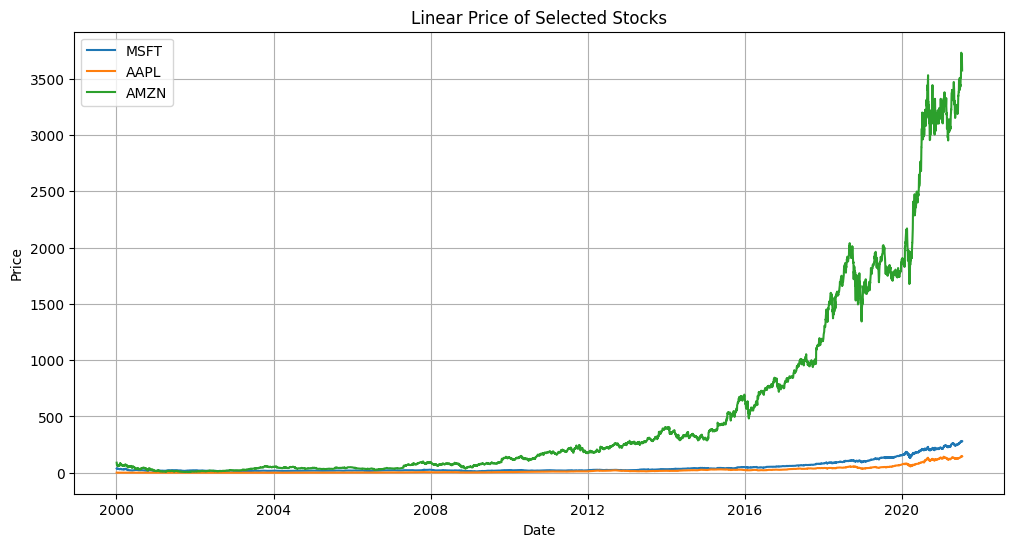

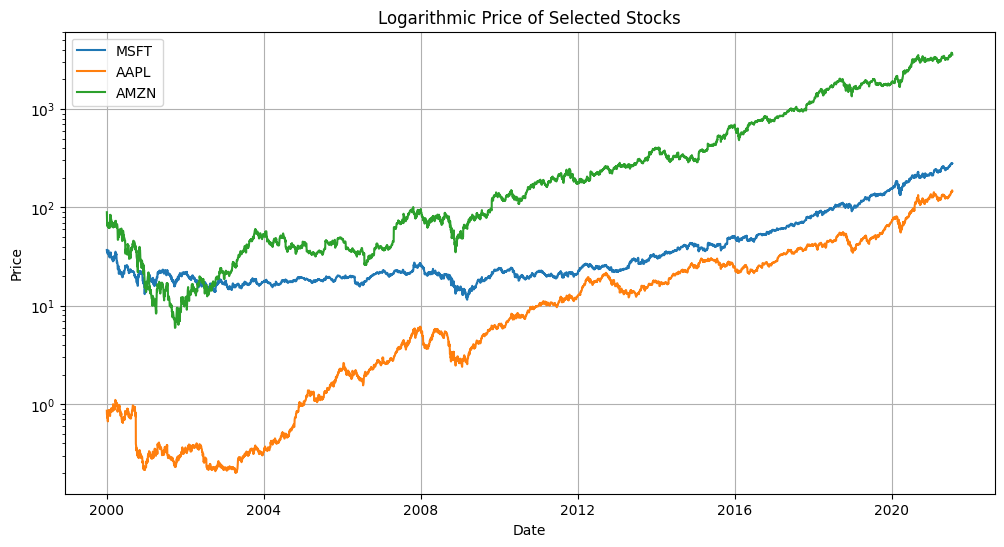

In [5]:
plot_lin_price(prices_df, selected_stocks)

plot_log_price(prices_df, selected_stocks)

Normalized Price of Selected Stocks

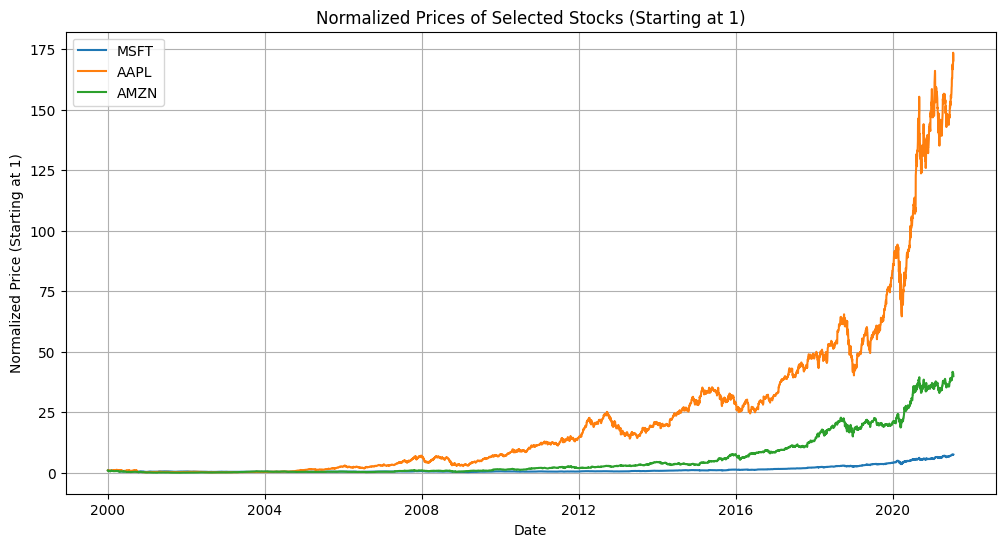

In [6]:
for stock_symbol in selected_stocks:
    norm_prices_df[stock_symbol] = prices_df[stock_symbol] / prices_df[stock_symbol].iloc[0]

plot_normalized_prices(norm_prices_df, selected_stocks)

Aritmethic and Logarithmic Returns of Selected Stocks

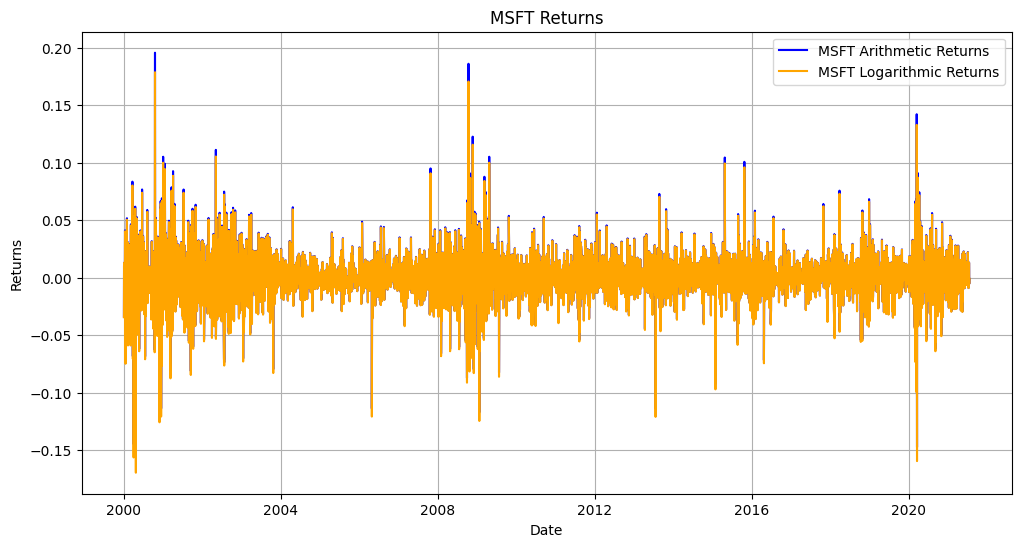

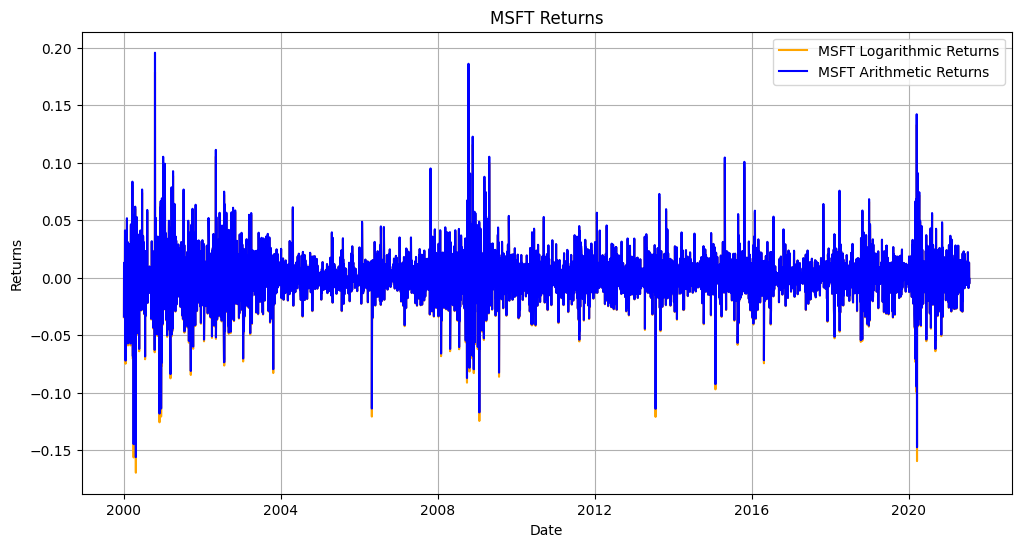

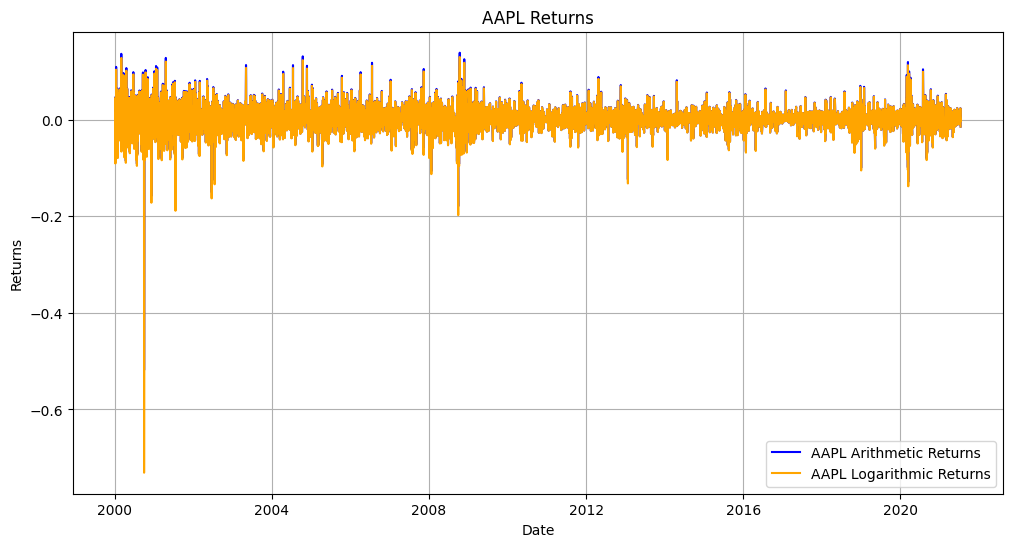

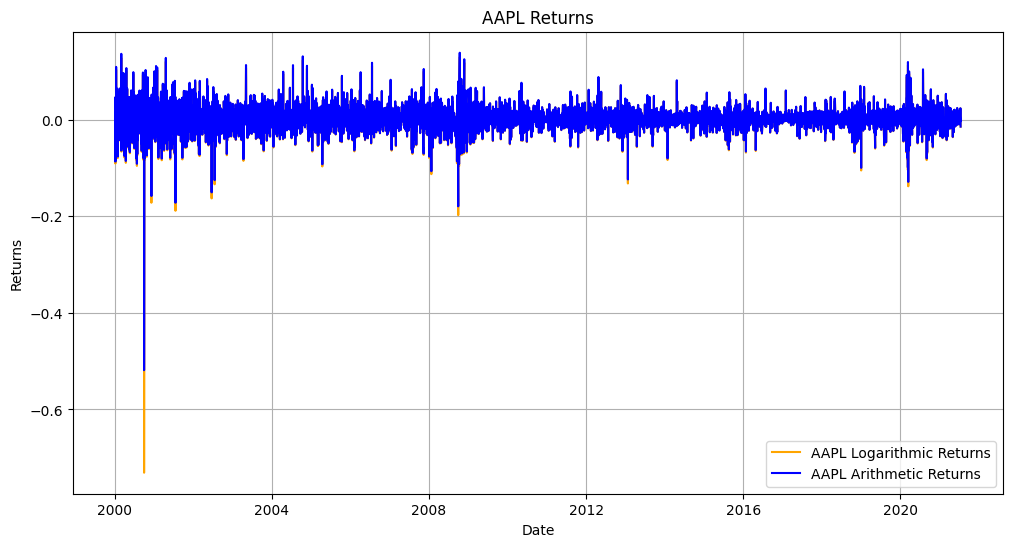

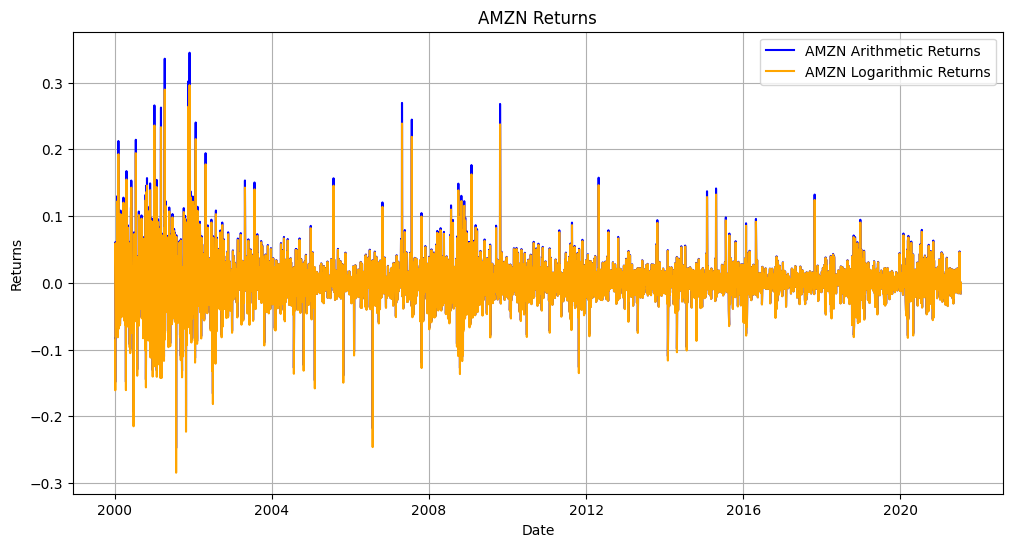

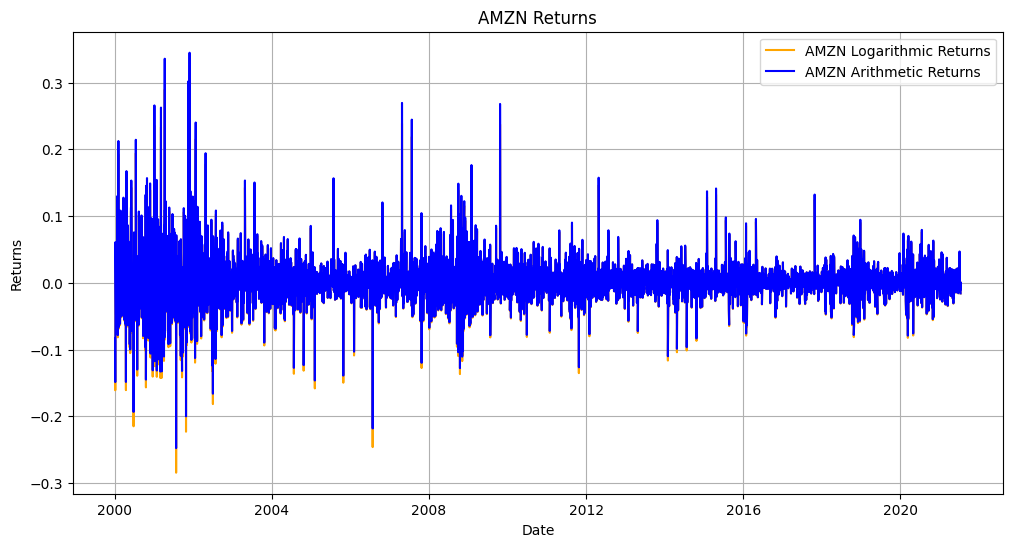

In [7]:
for stock_symbol in selected_stocks:
    # Arithmetic Returns DataFrame
    ar_returns_df[stock_symbol] = prices_df[stock_symbol].pct_change()

    # Logarithmic Returns DataFrame
    log_returns_df[stock_symbol] = np.log(prices_df[stock_symbol] / prices_df[stock_symbol].shift(1))

    plot_ar_log_returns(ar_returns_df, log_returns_df, stock_symbol)

Volatility of Selected Stocks (rolling window)

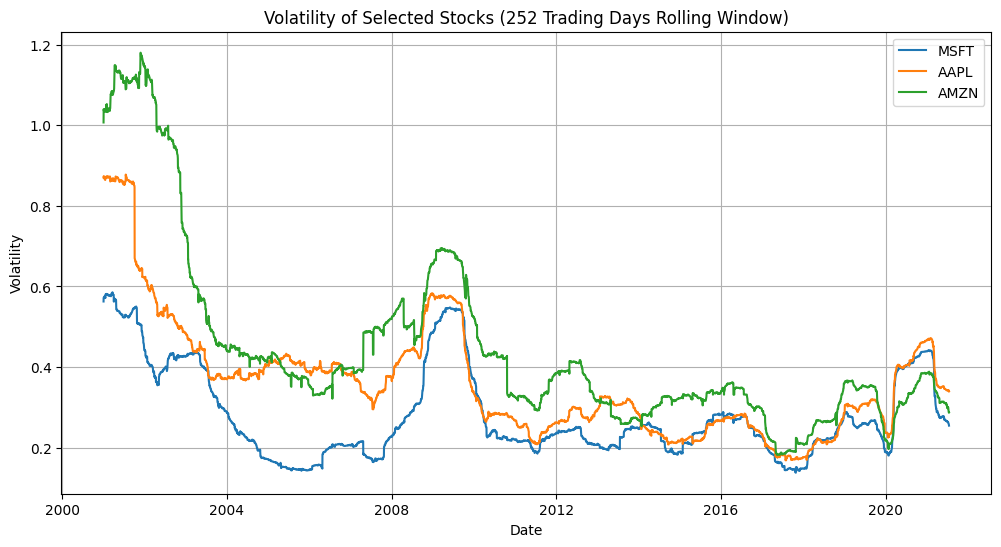

In [8]:
window_size = 252  # 252 trading days in a year

# Volatility DataFrame with Rolling Window
for stock_symbol in selected_stocks:
    volatility_df[stock_symbol] = ar_returns_df[stock_symbol].rolling(window=window_size).std() * (window_size**0.5)

plot_volatility(volatility_df, selected_stocks, window_size)

TEST 2

Ale

In [9]:
# Create separate DataFrames for annual and monthly volatilities
volatility_in_sample = pd.DataFrame(index=prices_df.index)
volatility_in_sample['Date'] = prices_df['Date']
volatility_out_of_sample = pd.DataFrame(index=prices_df.index)
volatility_out_of_sample['Date'] = prices_df['Date']

# Define the window size for annual and monthly calculations
window_in_sample = 21*12  # 252 trading days in a year
window_out_of_sample = 21  # 21 trading days in a month

# Calculate annual volatility using a 252-day rolling window
for stock_symbol in selected_stocks:
    volatility_in_sample[stock_symbol] = ar_returns_df[stock_symbol].rolling(window=window_in_sample).std()

# Calculate monthly volatility using a 21-day rolling window
for stock_symbol in selected_stocks:
    volatility_out_of_sample[stock_symbol] = ar_returns_df[stock_symbol].rolling(window=window_out_of_sample).std()

# Trim the DataFrames to match the length of the smaller rolling window
volatility_in_sample = volatility_in_sample.tail(len(volatility_in_sample) - window_in_sample)
volatility_in_sample = volatility_in_sample.head(len(volatility_in_sample) - window_out_of_sample).reset_index(drop=True)
volatility_out_of_sample = volatility_out_of_sample.tail(len(volatility_out_of_sample) - (window_out_of_sample + window_in_sample)).reset_index(drop=True)

average_ratios = {}
squared_difference = {}
covariance = {}
correlation = {}
for stock_symbol in selected_stocks:
    in_sample_volatility = volatility_in_sample[stock_symbol]
    out_of_sample_volatility = volatility_out_of_sample[stock_symbol]

    ratio = in_sample_volatility / out_of_sample_volatility
    average_ratio = ratio.mean()
    average_ratios[stock_symbol] = average_ratio

    difference = in_sample_volatility - out_of_sample_volatility
    squared_difference[stock_symbol] = sum(difference**2) / len(difference)

    covariance[stock_symbol] = volatility_in_sample[stock_symbol].cov(volatility_out_of_sample[stock_symbol])

    correlation[stock_symbol] = in_sample_volatility.corr(out_of_sample_volatility)

# Print the average ratios for each selected stock
for stock_symbol, avg_ratio in average_ratios.items():
    print(f"Average Ratio for {stock_symbol}: {avg_ratio}")
    print(f"Average Squared Difference for {stock_symbol}: {squared_difference[stock_symbol]}")
    print(f"Covariance between {window_in_sample}-day and {window_out_of_sample}-day volatility for {stock_symbol}: {covariance[stock_symbol]}")
    print(f"Correlation between {window_in_sample}-day and {window_out_of_sample}-day volatility for {stock_symbol}: {correlation[stock_symbol]}")
    print()

Average Ratio for MSFT: 1.2649221221943707
Average Squared Difference for MSFT: 7.166232652372796e-05
Covariance between 252-day and 21-day volatility for MSFT: 2.894728131318041e-05
Correlation between 252-day and 21-day volatility for MSFT: 0.46801621155260476

Average Ratio for AAPL: 1.2166287342758502
Average Squared Difference for AAPL: 8.081583975200744e-05
Covariance between 252-day and 21-day volatility for AAPL: 5.226166953630291e-05
Correlation between 252-day and 21-day volatility for AAPL: 0.5792432235852619

Average Ratio for AMZN: 1.2881973473683084
Average Squared Difference for AMZN: 0.00014288053770967696
Covariance between 252-day and 21-day volatility for AMZN: 0.00015596618844195223
Correlation between 252-day and 21-day volatility for AMZN: 0.7037494645265963



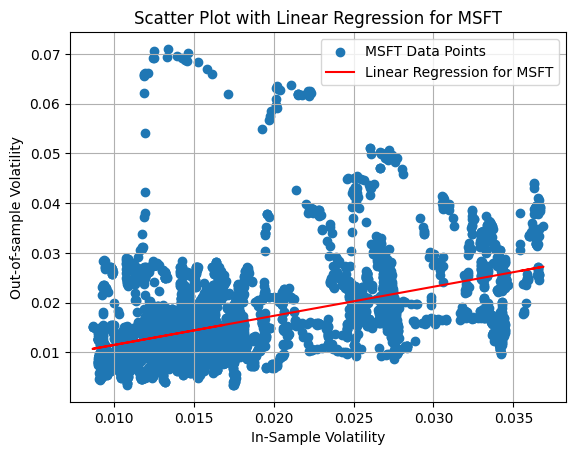

Linear Regression Results for MSFT:
Slope (a): 0.5860351966041084
Intercept (b): 0.005614163309522444
R-squared: 0.21903917427605243
P-value: 3.006378296684015e-281


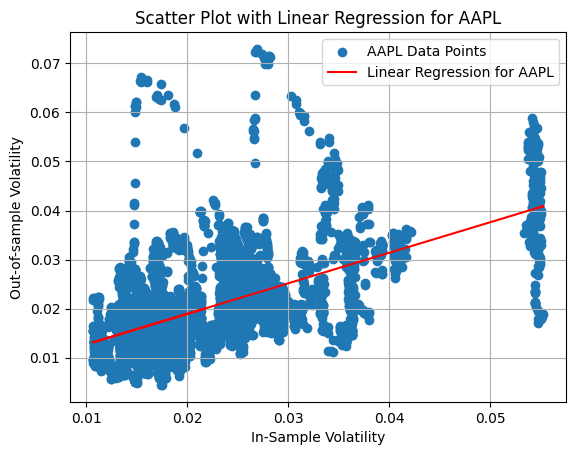

Linear Regression Results for AAPL:
Slope (a): 0.6223974538291468
Intercept (b): 0.006487541191117205
R-squared: 0.33552271206944584
P-value: 0.0


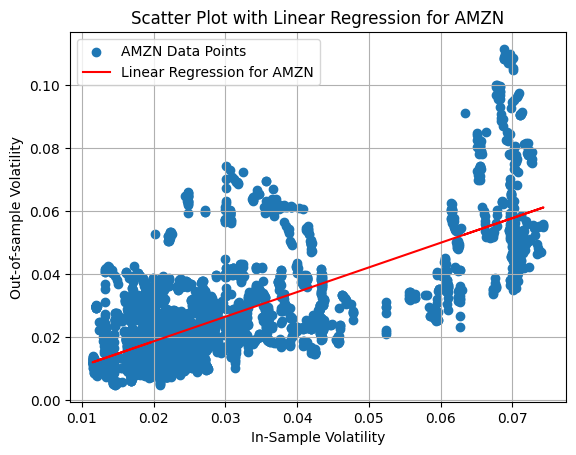

Linear Regression Results for AMZN:
Slope (a): 0.7812551436974451
Intercept (b): 0.0030933610012458847
R-squared: 0.4952633088214713
P-value: 0.0


In [10]:
# Create a scatter plot of all data points
for stock_symbol in selected_stocks:
    
    # Primijenite metodu najmanjeg kvadrata za linearnu regresiju
    slope, intercept, r_value, p_value, std_err = stats.linregress(volatility_in_sample[stock_symbol], volatility_out_of_sample[stock_symbol])

    # Scatter plot of data points with x as yearly volatility and y as monthly volatility
    plt.scatter(volatility_in_sample[stock_symbol], volatility_out_of_sample[stock_symbol], label=f'{stock_symbol} Data Points')

    # Plot the linear regression line
    x = volatility_in_sample[stock_symbol]
    y = slope * x + intercept
    plt.plot(x, y, color='red', label=f'Linear Regression for {stock_symbol}')

    # Ispis rezultata
    plt.xlabel('In-Sample Volatility')
    plt.ylabel('Out-of-sample Volatility')
    plt.title(f'Scatter Plot with Linear Regression for {stock_symbol}')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"Linear Regression Results for {stock_symbol}:")
    print("Slope (a):", slope)
    print("Intercept (b):", intercept)
    print("R-squared:", r_value**2)
    print("P-value:", p_value)


In [16]:
print(ar_returns_df['MSFT'].std()*252**0.5)

0.30579111689604394
